Data cleaning

In [638]:
import pandas as pd
import numpy as np

In [639]:
df=pd.read_csv('../data/sample.csv')

In [640]:
df.head()

,Property ID,Locality name,Postal code,price,Type of property,Subtype of property,Construction year,Number of rooms,Surface of the plot,Living area,...,Garden orientation,Number of facades,Swimming pool,State of builing,Energy class,Primary energy consumption,Heating type,Flood zone type,Double glazing,cadastral_income
0,20394069,Tienen,3300,184000,apartment,NaN,1972.0,2.0,NaN,81.0,...,NaN,4.0,NaN,To renovate,C,202.0,Gas,Non flood zone,Yes,755.0
1,20393142,Ninove,9400,299000,apartment,NaN,2006.0,3.0,NaN,153.0,...,NaN,2.0,NaN,Good,A,92.0,Fuel oil,Non flood zone,Yes,1054.0
2,20393714,Ronse,9600,465000,house,NaN,1962.0,4.0,800.0,389.0,...,South,4.0,NaN,To be done up,B,175.0,Gas,Non flood zone,Yes,1971.0
3,20394068,Brussel,1000,210000,apartment,NaN,2013.0,1.0,NaN,59.0,...,NaN,2.0,NaN,Good,E,234.0,Electric,Possible flood zone,Yes,920.0
4,20394202,Turnhout,2300,299000,apartment,NaN,2006.0,3.0,NaN,114.0,...,NaN,NaN,NaN,Good,B,147.0,Gas,Non flood zone,Yes,NaN


In [641]:
df.columns

Index(['Property ID', 'Locality name', 'Postal code', 'price',
       'Type of property', 'Subtype of property', 'Construction year',
       'Number of rooms', 'Surface of the plot', 'Living area', 'kitchen',
       'furnished', 'Open fire', 'Terrace', 'Garden', 'Garden orientation',
       'Number of facades', 'Swimming pool', 'State of builing',
       'Energy class', 'Primary energy consumption', 'Heating type',
       'Flood zone type', 'Double glazing', 'cadastral_income'],
      dtype='object')

In [642]:
df=df.drop(['Locality name','Subtype of property','Surface of the plot', 'Garden orientation','Energy class'],axis=1)
df=df.drop_duplicates(subset=['Property ID'])

In [643]:
df.describe()

,Property ID,Postal code,price,Construction year,Number of rooms,Living area,furnished,Open fire,Terrace,Garden,Number of facades,Swimming pool,Primary energy consumption,cadastral_income
count,7.100000e+01,71.000000,7.100000e+01,60.000000,70.000000,70.000000,25.000000,1.0,36.000000,14.000000,51.000000,13.0,69.000000,44.000000
mean,2.039293e+07,5851.549296,3.861570e+05,1982.950000,2.485714,137.200000,0.200000,1.0,20.833333,454.214286,2.411765,0.0,197.043478,1020.136364
std,2.593229e+03,3269.662524,2.224370e+05,33.299069,0.959209,82.086663,0.408248,NaN,30.282008,416.175846,0.697896,0.0,120.454218,624.063041
min,2.038088e+07,1000.000000,9.900000e+04,1899.000000,1.000000,35.000000,0.000000,1.0,1.000000,25.000000,2.000000,0.0,29.000000,294.000000
25%,2.039314e+07,2570.000000,2.465000e+05,1964.500000,2.000000,81.250000,0.000000,1.0,6.750000,93.500000,2.000000,0.0,92.000000,660.500000
50%,2.039412e+07,8000.000000,3.100000e+05,1987.500000,2.000000,108.000000,0.000000,1.0,11.000000,365.000000,2.000000,0.0,192.000000,954.500000
75%,2.039420e+07,8620.000000,4.825000e+05,2009.250000,3.000000,158.250000,0.000000,1.0,21.250000,666.500000,3.000000,0.0,291.000000,1171.250000
max,2.039424e+07,9820.000000,1.350000e+06,2023.000000,5.000000,426.000000,1.000000,1.0,172.000000,1400.000000,4.000000,0.0,462.000000,4079.000000


In [644]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Property ID                    0.000000
Postal code                    0.000000
price                          0.000000
Type of property               0.000000
Construction year             15.492958
Number of rooms                1.408451
Living area                    1.408451
kitchen                       19.718310
furnished                     64.788732
Open fire                     98.591549
Terrace                       49.295775
Garden                        80.281690
Number of facades             28.169014
Swimming pool                 81.690141
State of builing              14.084507
Primary energy consumption     2.816901
Heating type                  25.352113
Flood zone type               15.492958
Double glazing                12.676056
cadastral_income              38.028169
dtype: float64

Pre processing for training

In [645]:
df["Garden"] = np.where(df["Garden"].fillna(0) == 0, 0, 1)
df["Terrace"] = np.where(df["Terrace"].fillna(0) == 0, 0, 1)
df["Open fire"] = np.where(df["Open fire"].fillna(0) == 0, 0, 1)
df["furnished"] = np.where(df["furnished"].fillna(0) == 0, 0, 1)
df["Swimming pool"] = np.where(df["Swimming pool"].fillna(0) == 0, 0, 1)


df['extra_features']=df["Garden"]+df["Terrace"]+df["Open fire"]+df["furnished"]+df["Swimming pool"]

df=df.drop(['Garden','Terrace','Open fire','furnished','Swimming pool'],axis=1)

df=df.dropna(subset=['price'])

In [646]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import joblib


In [647]:
df['State of builing']=df['State of builing'].fillna('0')
#Encoding the state of building field
state_encoder = OrdinalEncoder(categories=[['0','To restore','To renovate','To be done up','Good','Just renovated','As new']])
df['State of builing']=state_encoder.fit_transform(df[['State of builing']])
joblib.dump(state_encoder,'../utils/state_building_ordinal.pkl')
#Replace missing with nan to impute later
df['State of builing']=df['State of builing'].replace(0.0,np.nan)


In [648]:
df['kitchen'].value_counts()

kitchen
Installed         29
Semi equipped     11
Hyper equipped     8
1                  7
Not installed      2
Name: count, dtype: int64

In [649]:
df['kitchen']=df['kitchen'].fillna('0')
#Encoding kitchen data
encoder = OrdinalEncoder(categories=[['0','Not installed','1','Installed','Semi equipped','Hyper equipped']])
df['kitchen']=encoder.fit_transform(df[['kitchen']])
joblib.dump(encoder,'../utils/kitchen_ordinal.pkl')
#Replace missing with nan to impute later
df['kitchen']=df['kitchen'].replace(0.0,np.nan)


In [650]:
df.kitchen

0     2.0
1     3.0
2     5.0
3     3.0
4     4.0
     ... 
67    3.0
68    3.0
69    5.0
70    NaN
71    NaN
Name: kitchen, Length: 71, dtype: float64

In [651]:
df['Flood zone type'].value_counts()

Flood zone type
Non flood zone         58
Possible flood zone     2
Name: count, dtype: int64

In [652]:
df["Flood zone type"] = np.where(df["Flood zone type"].fillna(0) == 'Possible flood zone', 1, 0)


In [653]:

from pandas.api.types import is_numeric_dtype
with_missing_values=df.columns[df.isna().any()].tolist()
missing_numeric=[]
for l in with_missing_values:
    if is_numeric_dtype(df[l]):
        missing_numeric.append(l)
    else:
        df[l]=df[l].fillna(df[l].mode().values[0])

In [654]:
df.dtypes

Property ID                     int64
Postal code                     int64
price                           int64
Type of property               object
Construction year             float64
Number of rooms               float64
Living area                   float64
kitchen                       float64
Number of facades             float64
State of builing              float64
Primary energy consumption    float64
Heating type                   object
Flood zone type                 int32
Double glazing                 object
cadastral_income              float64
extra_features                  int32
dtype: object

In [655]:
missing_numeric

['Construction year',
 'Number of rooms',
 'Living area',
 'kitchen',
 'Number of facades',
 'State of builing',
 'Primary energy consumption',
 'cadastral_income']

In [656]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

missing_numeric.insert(0,'price')
to_impute=df[missing_numeric]

imputer = IterativeImputer(max_iter=10, random_state=0)
imputed = imputer.fit_transform(to_impute)
test=pd.DataFrame(imputed,columns=to_impute.columns)

for l in missing_numeric:
    df[l]=test[l].to_numpy()

In [659]:
#One hot encoding nominal fields-prop type, sub prop type, locality
categorical_columns=['Postal code','Type of property','Heating type']
ohencoder = OneHotEncoder(drop='first',sparse_output=False)
one_hot_encoded = ohencoder.fit_transform(df[categorical_columns])
joblib.dump(ohencoder,'../utils/one_hot.pkl')
one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohencoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot_df.set_axis(df.index)], axis=1)

# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)

    
    

For analysis!

In [14]:
import pandas as pd

dfa=pd.read_csv('../data/analysis.csv',index_col=0)

In [15]:
dfa.head()

,Property ID,Postal code,price,Type of property,Construction year,Number of rooms,Living area,kitchen,furnished,Open fire,Terrace,Garden,Number of facades,Swimming pool,State of builing,Primary energy consumption,Heating type,Flood zone type,Double glazing,cadastral_income
0,20394069,3300,184000,apartment,1972.0,2.0,81.0,1,NaN,NaN,22.0,NaN,4.0,NaN,To renovate,202.0,Gas,Non flood zone,Yes,755.0
1,20393142,9400,299000,apartment,2006.0,3.0,153.0,Installed,NaN,NaN,6.0,NaN,2.0,NaN,Good,92.0,Fuel oil,Non flood zone,Yes,1054.0
2,20393714,9600,465000,house,1962.0,4.0,389.0,Hyper equipped,NaN,1.0,22.0,650.0,4.0,NaN,To be done up,175.0,Gas,Non flood zone,Yes,1971.0
3,20394068,1000,210000,apartment,2013.0,1.0,59.0,Installed,1.0,NaN,3.0,NaN,2.0,NaN,Good,234.0,Electric,Possible flood zone,Yes,920.0
4,20394202,2300,299000,apartment,2006.0,3.0,114.0,Semi equipped,NaN,NaN,4.0,NaN,NaN,NaN,Good,147.0,Gas,Non flood zone,Yes,NaN


In [16]:
dfa.columns

Index(['Property ID', 'Postal code', 'price', 'Type of property',
       'Construction year', 'Number of rooms', 'Living area', 'kitchen',
       'furnished', 'Open fire', 'Terrace', 'Garden', 'Number of facades',
       'Swimming pool', 'State of builing', 'Primary energy consumption',
       'Heating type', 'Flood zone type', 'Double glazing',
       'cadastral_income'],
      dtype='object')

In [17]:
dfa = dfa.drop(columns=["Property ID"])
df=dfa

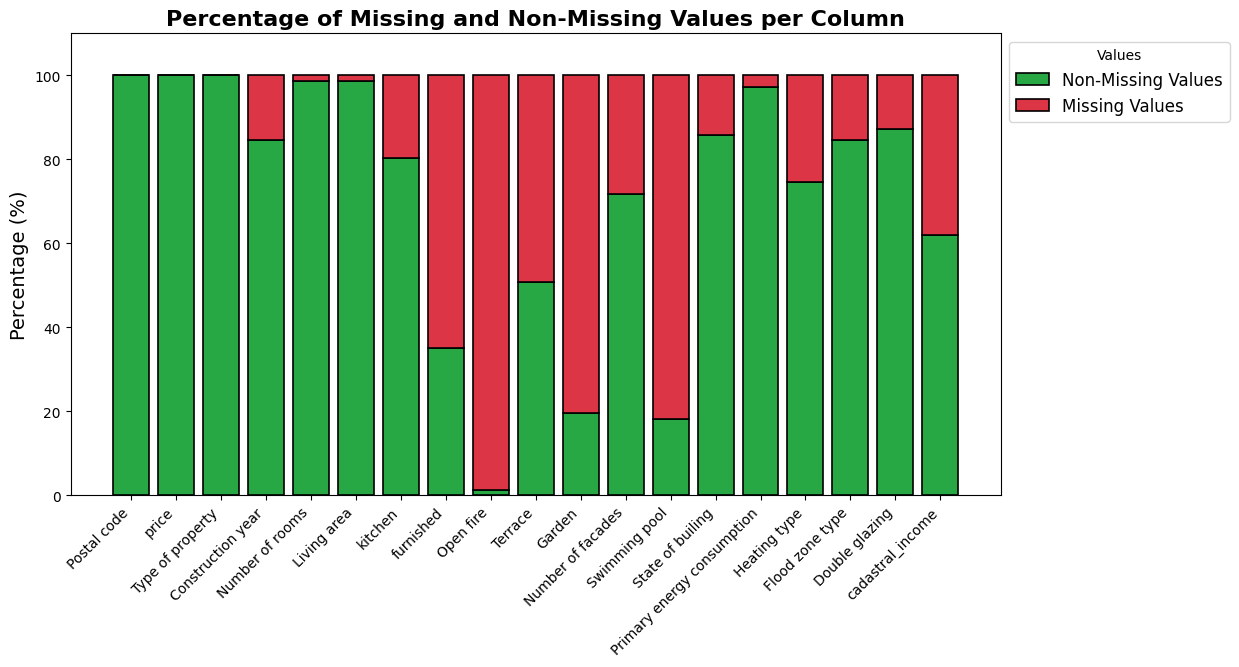

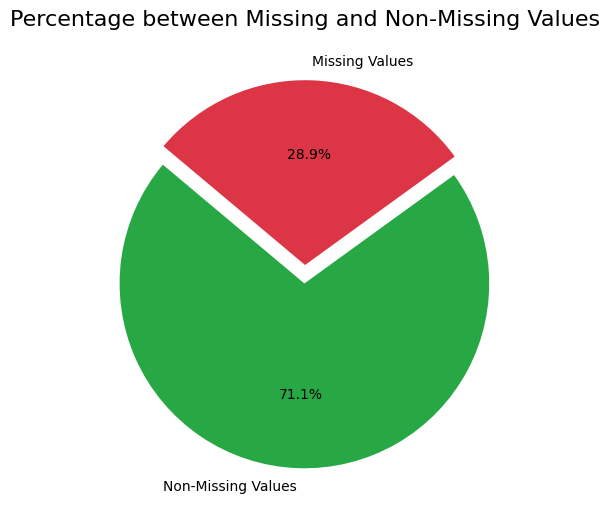

In [18]:
import matplotlib.pyplot as plt

percent_missing = df.isnull().sum() * 100 / len(df)
percent_non_null = 100 - percent_missing

plt.figure(figsize=(12, 6))


# Plot the Non-Missing Values
bars_non_null = plt.bar(df.columns, percent_non_null, label='Non-Missing Values', 
                         color='#28a745', edgecolor='black', linewidth=1.2)

# Plot the Missing Values on top of the Non-Missing Values
bars_missing = plt.bar(df.columns, percent_missing, bottom=percent_non_null, 
                        label='Missing Values', color='#dc3545', edgecolor='black', linewidth=1.2)

# Customize the plot
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Percentage of Missing and Non-Missing Values per Column', fontsize=16, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 110)  # Set y-axis limits to provide some space above the bars

# Add legend outside the plot area
plt.legend(title='Values', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# Calculate total number of missing and non-missing values
total_missing = df.isnull().sum().sum() 
total_non_missing = df.size - total_missing  


labels = ['Non-Missing Values', 'Missing Values']
sizes = [total_non_missing, total_missing]
colors = ['#28a745', '#dc3545'] 

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))  # Explode the first slice for emphasis
plt.title('Percentage between Missing and Non-Missing Values', fontsize=16)
plt.show()

In [19]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

Number of outliers detected: 2
On the number of 71 values
2.82 % outliers
Mean value: € 386157.0
Median value: € 310000.0
Mode value: € 299000


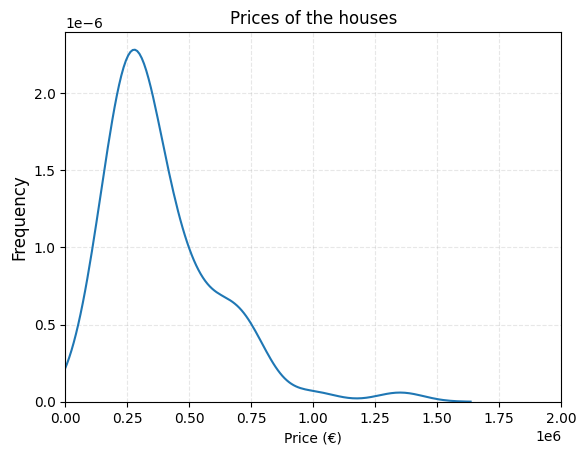

<Axes: ylabel='price'>

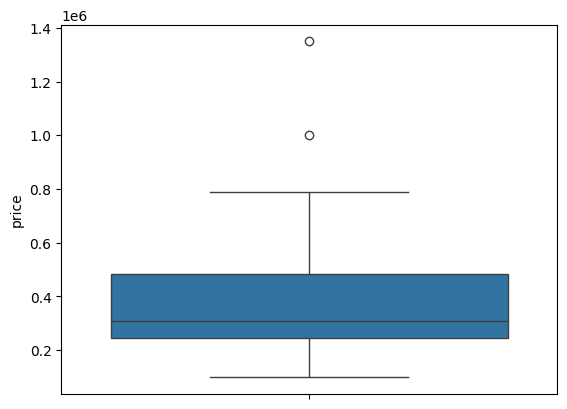

In [22]:
import seaborn as sns
outliers = sum(detect_outliers_iqr(df['price']))
number_of_values = len(df) - df['price'].isna().sum()
percent_outliers = 100 * outliers / number_of_values
print(f"Number of outliers detected: {(outliers)}")
print(f"On the number of {number_of_values} values")
print(f"{round(percent_outliers, 2)} % outliers")
print("Mean value: €", round(df['price'].mean(),1))
print("Median value: €", df['price'].median())
print("Mode value: €", df['price'].mode()[0])


# Create the plot
sns.kdeplot(data = df['price'])
plt.title('Prices of the houses')
plt.xlim([0,2000000])  
plt.xlabel("Price (€)")    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()

# Box Plot
sns.boxplot(df['price'])